In [140]:
%matplotlib inline
import h5py
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image
from scipy.optimize import curve_fit
import glob

In [141]:
data_folder = 'sun_azimuth/'

az_files = glob.glob(data_folder + "sun*") #This command grabs all of the files starting with "sun_az" in your data folder.
az_files.sort() #Notably, the "glob" function does NOT sort the list it creates, so we do that here with the "sort" command
data_folder = 'sun_elevation/'
el_files = glob.glob(data_folder + "sun*")
el_files.sort()
print((el_files))

['sun_elevation/sun_el_m1', 'sun_elevation/sun_el_m2', 'sun_elevation/sun_el_m3', 'sun_elevation/sun_el_m4', 'sun_elevation/sun_el_m5', 'sun_elevation/sun_el_p1', 'sun_elevation/sun_el_p10', 'sun_elevation/sun_el_p2', 'sun_elevation/sun_el_p3', 'sun_elevation/sun_el_p4', 'sun_elevation/sun_el_p5', 'sun_elevation/sun_el_p6', 'sun_elevation/sun_el_p7', 'sun_elevation/sun_el_p8', 'sun_elevation/sun_el_p9']


In [142]:
az_spectra = [] # Create an empty array to later hold each of the spectra from the azimuthal scans

for az_file in az_files: #Pull each individual filename from the list of azimuth files
    
    with open(az_file) as az_data: #This opens up the file and puts each line into a list called az_data
        
        spectrum_rows = []    # We create a new empty list to put the rows with our spectral data into.
        
        for j, row in enumerate(az_data, start=1): # enumerate() works a lot like range(). You get an index (j, here) which is iterated over, but you also get an object (row) corresponding to the items in the list you're iterating over (that is, inside this loop, row is the same as az_data[j])
            if j%4 == 0: # The operator "%" is called the modulus. It returns the remainder of a division (e.g. 6%4=2). So, by checking when j%4 is zero, we get every fourth row in the data (which is where our spectral data is).
                spectrum_rows.append(row) # Throw every fourth row into our list of spectral data.
                
        tot_spectrum = np.zeros(1024) #Create an array of 1024 0's.
        for row in spectrum_rows: 
            temp_spec = row.split(' ') # Our rows are actually strings. To break them up, we use the split() command, which splits a string into a list by grabbing each segment separated by the delimiter you put in the parentheses (e.g. If you do 'abc def ghi'.split(' '), you'll get the list [abc,def,ghi])
            spec = [] # Create an empty list to hold the spectral data
            for val in temp_spec: # Iterate over the elements of your split list.
                if val != '' and val != '\n': # This excludes some "nonsense" cases where elements in your split list are empty strings or end-of-line characters
                    spec.append(val) #Throw the values that are actually fluxes into your spectrum array.
                    
                    
            tot_spectrum = tot_spectrum + np.float64(spec) # Add the data from the current row to your total spectral data for this file.
            
        az_spectra.append(tot_spectrum)
        


In [143]:
el_spectra = [] # Create an empty array to later hold each of the spectra from the elimuthal scans

for el_file in el_files: #Pull each individual filename from the list of elimuth files
    
    with open(el_file) as el_data: #This opens up the file and puts each line into a list called el_data
        
        spectrum_rows = []    # We create a new empty list to put the rows with our spectral data into.
        
        for j, row in enumerate(el_data, start=1): # enumerate() works a lot like range(). You get an index (j, here) which is iterated over, but you also get an object (row) corresponding to the items in the list you're iterating over (that is, inside this loop, row is the same as el_data[j])
            if j%4 == 0: # The operator "%" is called the modulus. It returns the remainder of a division (e.g. 6%4=2). So, by checking when j%4 is zero, we get every fourth row in the data (which is where our spectral data is).
                spectrum_rows.append(row) # Throw every fourth row into our list of spectral data.
                
        tot_spectrum = np.zeros(1024) #Create an array of 1024 0's.
        for row in spectrum_rows: 
            temp_spec = row.split(' ') # Our rows are actually strings. To break them up, we use the split() command, which splits a string into a list by grabbing each segment separated by the delimiter you put in the parentheses (e.g. If you do 'abc def ghi'.split(' '), you'll get the list [abc,def,ghi])
            spec = [] # Create an empty list to hold the spectral data
            for val in temp_spec: # Iterate over the elements of your split list.
                if val != '' and val != '\n': # This excludes some "nonsense" cases where elements in your split list are empty strings or end-of-line characters
                    spec.append(val) #Throw the values that are actually fluxes into your spectrum array.
                    
                    
            tot_spectrum = tot_spectrum + np.float64(spec) # Add the data from the current row to your total spectral data for this file.
            
        el_spectra.append(tot_spectrum)


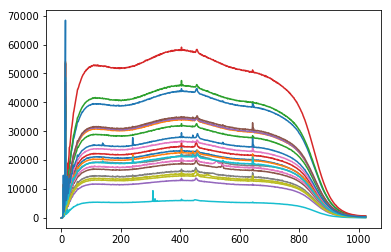

In [146]:
for i in range(len(az_spectra)):
    plt.plot(az_spectra[i])
plt.show()

In [256]:
def func_gaus (x,a,sigma,mu):
    return (a*np.exp((-1/2)*((x-mu)/sigma)**2))

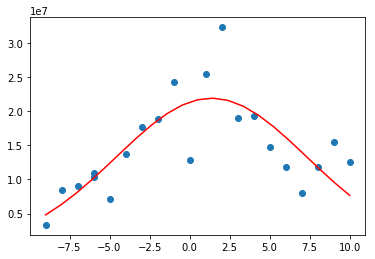

In [257]:
az_new_mean_spectra = []
az = [-1,-2,-3,-4,-5,-6,-6,-7,-8,-9,0,10,1,2,3,4,5,6,7,8,9]
az_new = np.linspace(-9,10,21)
at, bt, ct = 1e5, 13, 0
for i in range(len(az_spectra)):
    az_new_mean_spectra.append((np.asarray(az_spectra[i][100:700])).sum())
    
at, bt, ct = 1e5, 13, 0
coeffs, fiterr = curve_fit(func_gaus, np.asarray(az), az_new_mean_spectra , p0=(at,bt,ct), maxfev = 10000)
plt.scatter(az,az_new_mean_spectra)
plt.plot(az_new , func_gaus(az_new,*coeffs),'r')
plt.show()

In [258]:
FWHM = 2*np.sqrt(2*np.log(2))*coeffs[1]
print(coeffs)
print(FWHM)

[  2.18961301e+07   5.95851842e+00   1.37158195e+00]
14.031238616


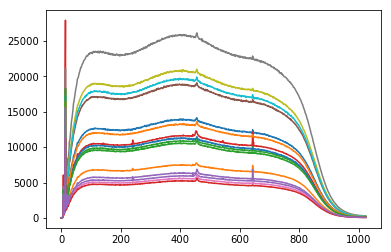

In [259]:
for i in range(len(el_spectra)):
    plt.plot(el_spectra[i])
plt.show()

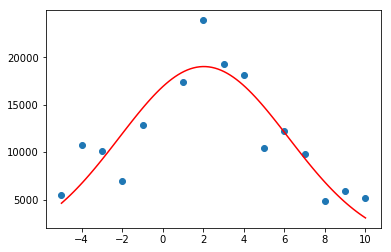

In [260]:
el_new_mean_spectra = []
el = [-1,-2,-3,-4,-5,1,10,2,3,4,5,6,7,8,9]
el_new = np.linspace(-5,10,100)

for i in range(len(el_spectra)):
    el_new_mean_spectra.append(np.asarray(el_spectra[i][100:700]).mean())

at, bt, ct = 1e5, 13, 0
coeffs, fiterr = curve_fit(func_gaus, np.asarray(el), el_new_mean_spectra , p0=(at,bt,ct), maxfev = 10000)

plt.scatter(el,el_new_mean_spectra)
plt.plot(el_new , func_gaus(el_new,*coeffs),'r')
plt.show()

In [261]:
FWHM = 2*np.sqrt(2*np.log(2))*coeffs[1]
print(coeffs)
print(FWHM)

[  1.90222486e+04   4.17398491e+00   2.02467035e+00]
9.82898333958


In [267]:
telescope_diameter = 2.2
c = 2.998e8
wavelength = c/(coeffs[2]*1000000)
diffraction = (1.22*wavelength)/telescope_diameter
print(diffraction)

82.1134795253
